<a href="https://colab.research.google.com/github/SonaliAnesta/ML-Project/blob/master/Hand_Writing_Letter_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
keras = tf.keras

In [0]:
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [0]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd /content/drive/My Drive/EnglishHnd

/content/drive/My Drive/EnglishHnd


In [0]:
DATA_DIR = './Img'
batch_size = 20
epochs = 15
IMG_HEIGHT = 80
IMG_WIDTH = 50

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=.20) 
validation_image_generator = ImageDataGenerator(rescale=1./255, validation_split=.20) 

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=DATA_DIR,
                                                           shuffle=True,
                                                           subset="training",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2304 images belonging to 52 classes.


In [0]:
label_map = (train_data_gen.class_indices)
print(label_map[])

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51}


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=DATA_DIR,
                                                              shuffle=False,
                                                              subset="validation",
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 574 images belonging to 52 classes.


In [0]:
total_train = 115
total_val = 29

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

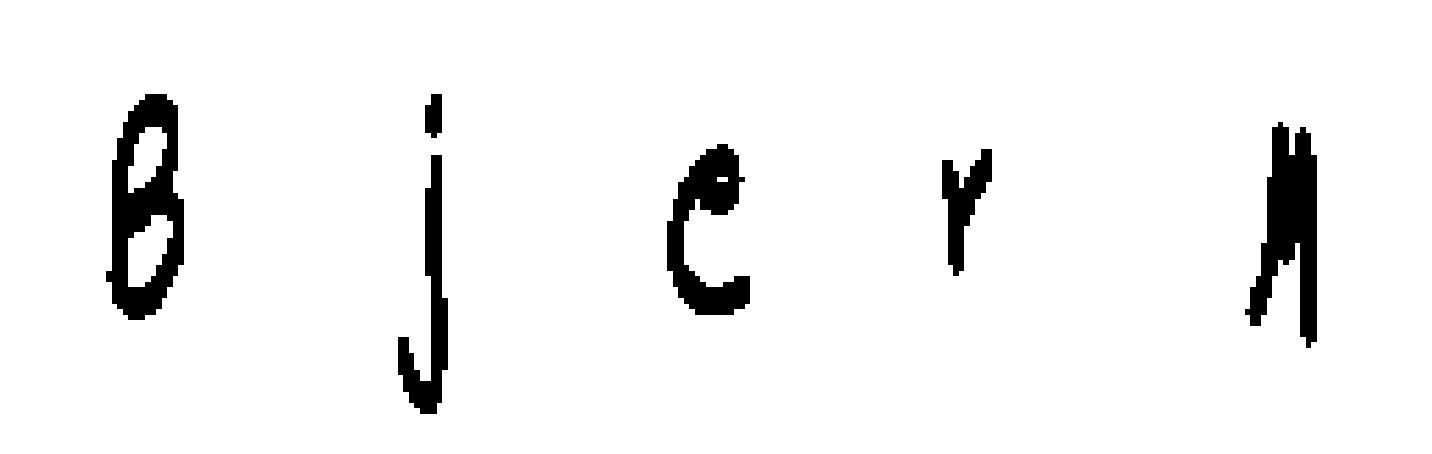

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(52)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 6, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
115/115 [==============================] - 893s 8s/step - loss: 3.6532 - accuracy: 0.0876 - val_loss: 3.0197 - val_accuracy: 0.2247
Epoch 2/15
115/115 [==============================] - 39s 340ms/step - loss: 1.7853 - accuracy: 0.5148 - val_loss: 1.8954 - val_accuracy: 0.4965
Epoch 3/15
115/115 [==============================] - 39s 340ms/step - loss: 0.9262 - accuracy: 0.7360 - val_loss: 1.6536 - val_accuracy: 0.5854
Epoch 4/15
115/115 [==============================] - 39s 336ms/step - loss: 0.5399 - accuracy: 0.8314 - val_loss: 1.7728 - val_accuracy: 0.5958
Epoch 5/15
115/115 [==============================] - 39s 337ms/step - loss: 0.3340 - accuracy: 0.8980 - val_loss: 1.8811 - val_accuracy: 0.6272
Epoch 6/15
115/115 [==============================] - 39s 336ms/step - loss: 0.1984 - accuracy: 0.9418 - val_loss: 1.8637 - val_accuracy: 0.6376
Epoch 7/15
115/115 [==============================] - 39

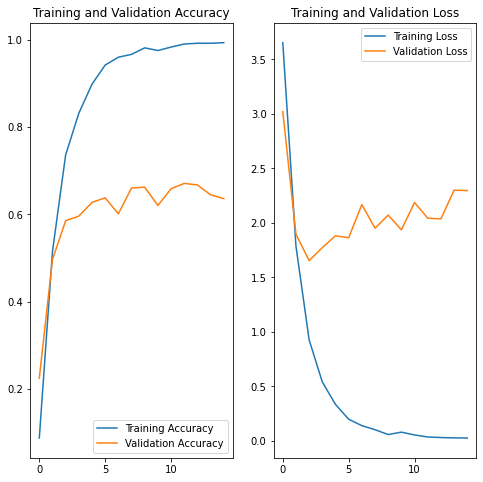

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.save('Handwriting_detection.h5')